In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
import colorcet as cc
import matplotlib.pyplot as plt


In [2]:
with open('./sec_last_for_tsne_feat_ms_m.pk','rb') as f:
    feature_ms_m = pickle.load(f)
# print(np.array(feature_ms_m)[:,0,:].shape)
f_ms_m = np.array(feature_ms_m)[:,0,:]
print('f_ms_m.shape:', f_ms_m.shape)

with open('./sec_last_for_tsne_label_ms_m.pk','rb') as f:
    labels_ms_m = pickle.load(f)
# print(np.array(labels_ms_s))
# print(np.array(labels_ms_m)[::-1].shape)
labels_ms_m = np.array(labels_ms_m)[::-1]
print('labels_ms_m.shape:', labels_ms_m.shape)

with open('./sec_last_for_tsne_feat_ms_s.pk','rb') as f:
    feature_ms_s = pickle.load(f)
# print(np.array(feature_ms_s)[:,0,:].shape)
f_ms_s = np.array(feature_ms_s)[:,0,:]
print('f_ms_s.shape:', f_ms_s.shape)

with open('./sec_last_for_tsne_label_ms_s.pk','rb') as f:
    labels_ms_s = pickle.load(f)
# print(np.array(labels_ms_s))
# print(np.array(labels_ms_s)[::-1].shape)
labels_ms_s = np.array(labels_ms_s)[::-1]
print('labels_ms_s.shape:', labels_ms_s.shape)
f_ms = np.concatenate([f_ms_m, f_ms_s])
print('f_ms.shape:', f_ms.shape)
label_ms = np.concatenate([labels_ms_m, labels_ms_s])
print('label_ms.shape:', label_ms.shape)
domain_ms = np.concatenate([np.ones_like(labels_ms_m), np.zeros_like(labels_ms_s)])

f_ms_m.shape: (11200, 768)
labels_ms_m.shape: (11200, 1)
f_ms_s.shape: (15887, 768)
labels_ms_s.shape: (15887, 1)
f_ms.shape: (27087, 768)
label_ms.shape: (27087, 1)


In [3]:
# with open('./sec_last_for_tsne_feat_mu_m.pk','rb') as f:
#     feature_mu_m = pickle.load(f)
# # np.array(feature_mu_m)[:,0,:].shape
# f_mu_m = np.array(feature_mu_m)[:,0,:]
# print('f_mu_m.shape:', f_mu_m.shape)

# with open('./sec_last_for_tsne_label_mu_m.pk','rb') as f:
#     labels_mu_m = pickle.load(f)
# # print(np.array(labels_ms_s))
# labels_mu_m = np.array(labels_mu_m)[::-1]
# print('labels_mu_m.shape:', labels_mu_m.shape)

# with open('./sec_last_for_tsne_feat_mu_u.pk','rb') as f:
#     feature_mu_u = pickle.load(f)   
# # np.array(feature_mu_u)[:,0,:]
# f_mu_u = np.array(feature_mu_u)[:,0,:]
# print('f_mu_u.shape:', f_mu_u.shape)

# with open('./sec_last_for_tsne_label_mu_u.pk','rb') as f:
#     labels_mu_u = pickle.load(f)
# labels_mu_u = np.array(labels_mu_u)[::-1]
# print('labels_mu_u.shape:', labels_mu_u.shape)
# f_mu = np.concatenate([f_mu_m, f_mu_u])
# print('f_mu.shape:', f_mu.shape)
# label_mu = np.concatenate([labels_mu_m, labels_mu_u])
# print('label_mu.shape:', label_mu.shape)

In [4]:
tsne = TSNE(n_components=2, perplexity=50, n_jobs=-1)
tsne_component_ms = tsne.fit_transform(f_ms)

/home/hsien/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hsien/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [5]:
tsneDf_ms = pd.DataFrame(data = tsne_component_ms
             , columns = ['tsne1', 'tsne2'])
tsneDf_ms['target'] = np.array(label_ms)

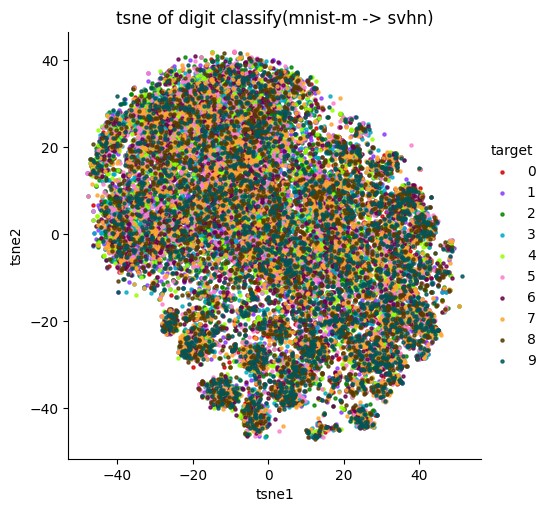

In [6]:
sns.lmplot(x="tsne1", y="tsne2",
  data=tsneDf_ms, 
  fit_reg=False, 
  hue='target', # color by cluster
  palette = sns.color_palette(cc.glasbey, n_colors=50),
  legend=True,
  scatter_kws={"s": 5}) # specify the point size
ax = plt.gca()
ax.set_title("tsne of digit classify(mnist-m -> svhn)")
plt.savefig('./tsne_ms_last', dpi=300, bbox_inches='tight')

In [7]:
tsneDf_ms_domain = pd.DataFrame(data = tsne_component_ms
             , columns = ['tsne1', 'tsne2'])
tsneDf_ms_domain['target'] = np.array(domain_ms)

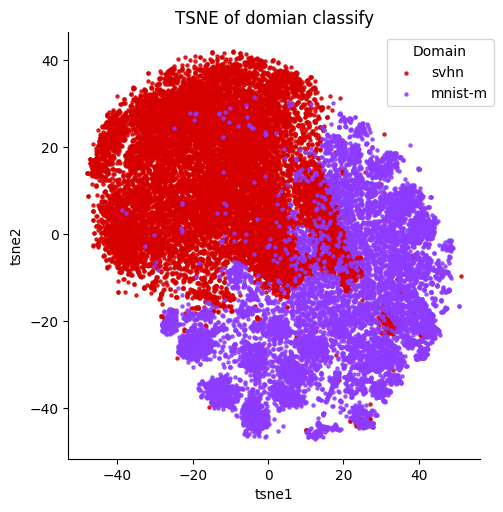

In [8]:
sns.lmplot(x="tsne1", y="tsne2",
  data=tsneDf_ms_domain, 
  fit_reg=False, 
  hue='target', # color by cluster
  palette = sns.color_palette(cc.glasbey, n_colors=50),
  # legend=True,
  legend=False,
  scatter_kws={"s": 5}) # specify the point size
ax = plt.gca()
ax.legend(title='Domain', bbox_to_anchor=(1.05, 1), labels=['svhn', 'mnist-m'])
ax.set_title("TSNE of domian classify")
plt.savefig('./tsne_ms_domain', dpi=300, bbox_inches='tight')

In [9]:
with open('./sec_last_for_tsne_feat_mu_m.pk','rb') as f:
    feature_mu_m = pickle.load(f)
# np.array(feature_mu_m)[:,0,:].shape
f_mu_m = np.array(feature_mu_m)[:,0,:]
print('f_mu_m.shape:', f_mu_m.shape)

with open('./sec_last_for_tsne_label_mu_m.pk','rb') as f:
    labels_mu_m = pickle.load(f)
# print(np.array(labels_ms_s))
labels_mu_m = np.array(labels_mu_m)[::-1]
print('labels_mu_m.shape:', labels_mu_m.shape)

with open('./sec_last_for_tsne_feat_mu_u.pk','rb') as f:
    feature_mu_u = pickle.load(f)   
# np.array(feature_mu_u)[:,0,:]
f_mu_u = np.array(feature_mu_u)[:,0,:]
print('f_mu_u.shape:', f_mu_u.shape)

with open('./sec_last_for_tsne_label_mu_u.pk','rb') as f:
    labels_mu_u = pickle.load(f)
labels_mu_u = np.array(labels_mu_u)[::-1]
print('labels_mu_u.shape:', labels_mu_u.shape)
f_mu = np.concatenate([f_mu_m, f_mu_u])
print('f_mu.shape:', f_mu.shape)
label_mu = np.concatenate([labels_mu_m, labels_mu_u])
print('label_mu.shape:', label_mu.shape)
domain_mu = np.concatenate([np.ones_like(labels_mu_m), np.zeros_like(labels_mu_u)])

f_mu_m.shape: (11200, 768)
labels_mu_m.shape: (11200, 1)
f_mu_u.shape: (1488, 768)
labels_mu_u.shape: (1488, 1)
f_mu.shape: (12688, 768)
label_mu.shape: (12688, 1)


In [10]:
tsne = TSNE(n_components=2, perplexity=50, n_jobs=-1)
tsne_component_mu = tsne.fit_transform(f_mu)

/home/hsien/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hsien/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [11]:
tsneDf_mu = pd.DataFrame(data = tsne_component_mu
             , columns = ['tsne1', 'tsne2'])
tsneDf_mu['target'] = np.array(label_mu)

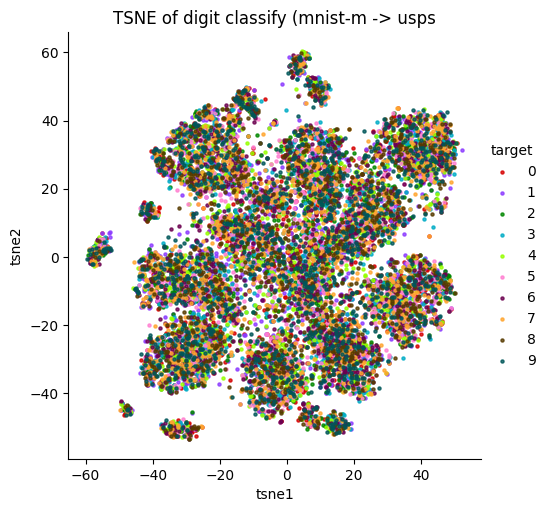

In [12]:
sns.lmplot(x="tsne1", y="tsne2",
  data=tsneDf_mu, 
  fit_reg=False, 
  hue='target', # color by cluster
  palette = sns.color_palette(cc.glasbey, n_colors=50),
  legend=True,
  scatter_kws={"s": 5}) # specify the point size
ax = plt.gca()
ax.set_title("TSNE of digit classify (mnist-m -> usps")
plt.savefig('./tsne_mu_last', dpi=300, bbox_inches='tight')

In [13]:
tsneDf_mu_domain = pd.DataFrame(data = tsne_component_mu
             , columns = ['tsne1', 'tsne2'])
tsneDf_mu_domain['target'] = np.array(domain_mu)

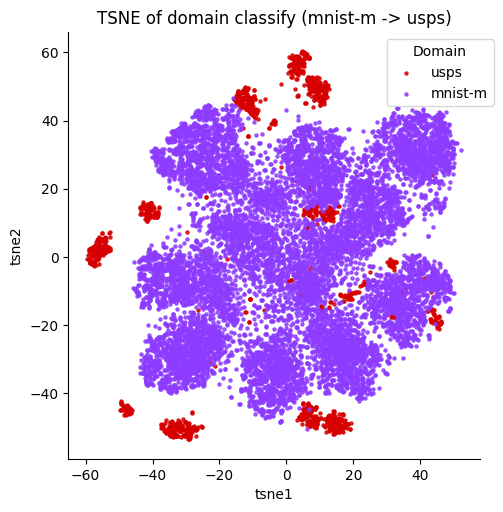

In [14]:
sns.lmplot(x="tsne1", y="tsne2",
  data=tsneDf_mu_domain, 
  fit_reg=False, 
  hue='target', # color by cluster
  palette = sns.color_palette(cc.glasbey, n_colors=50),
  legend=False,
  scatter_kws={"s": 5}) # specify the point size
ax = plt.gca()
ax.legend(title='Domain', bbox_to_anchor=(1.05, 1), labels=['usps', 'mnist-m'])
ax.set_title("TSNE of domain classify (mnist-m -> usps)")
plt.savefig('./tsne_mu_domain', dpi=300, bbox_inches='tight')